In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import re

In [4]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios-BHRP.csv')
df_1 = df_1[(df_1['Ano'] == 2019)]
df_1.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Valor adicionado bruto da Indústria a preços correntes (R$ 1.000),Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000),"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)",Valor adicionado bruto total a preços correntes (R$ 1.000),"Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)",Produto Interno Bruto a preços correntes (R$ 1.000),"Produto Interno Bruto per capita a preços correntes (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
17,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"63,197","51,778","49,607","181,944","6,005","187,949","24,361.53",Indústrias extrativas,"Administração, defesa, educação e saúde públic...",Demais serviços
35,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,"11,537,468","9,924,629","2,212,077","23,687,150","4,379,098","28,066,248","63,882.75",Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...
53,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,"9,781","41,414","30,739","96,526","5,797","102,323","14,898.51",Demais serviços,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a..."
71,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,"1,041,129","982,042","255,486","2,300,665","215,568","2,516,233","62,744.25",Demais serviços,Indústrias extrativas,"Administração, defesa, educação e saúde públic..."
89,2019,3,Sudeste,31,MG,Minas Gerais,3109600,Cachoeira da Prata,NaN,3107,...,"2,273","18,942","19,154","41,662","5,085","46,748","12,974.72","Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [6]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [7]:
#Dataser IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [9]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,859,0,99,0,904,24,0.655,0.672,0.814,0.514
1,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,586,0,57,3,637,4,0.749,0.709,0.864,0.687
2,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,1650,0,413,29,1507,30,0.637,0.669,0.834,0.464
3,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,1025,1,191,23,949,31,0.747,0.761,0.857,0.639
4,2019,3,Sudeste,31,MG,Minas Gerais,3114907,Casa Grande,NaN,3107,...,776,0,117,30,692,5,0.652,0.608,0.823,0.555


In [6]:
#Filtro para selecionar somente os dados do ano de 2019

df = df[(df['Ano'] == 2019)]

NameError: name 'df' is not defined

In [36]:
df.head()

,Nome da cidade,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,466,2,741,9,1,3,0,436,0,247,0,0,0,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [10]:
t = []
for i in df:
    x = []
    for j in df[i]:
        x.append(j)
    t.append(x)

aux = t[1:]
aux

[[3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 ['Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste',
  'Sudeste'],
 [31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  31,
  

In [28]:
#Tratamento dos dados categóricos

#Região Metropolitana [0,1]
#Hierarqui Urbana (principais categorias)
#Nome da Mesorregião
#Nome da Microrregião
#Nome da Região Geográfica Imediata
#Nome da Região Geográfica Intermediária
#Nome Concentração Urbana
#Nome Concentração Urbana
#Tipo Concentração Urbana
#Nome Arranjo Populacional
#Nome da Região Rural
#Região rural (segundo classificação do nucleo)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
c = le.fit(df['Região Metropolitana'])
c = le.transform(df['Região Metropolitana'])
#print(c)

le = preprocessing.LabelEncoder()
d = le.fit(df['Hierarquia Urbana (principais categorias)'])
d = le.transform(df['Hierarquia Urbana (principais categorias)'])
#print(d)

le = preprocessing.LabelEncoder()
e = le.fit(df['Nome do Município'])
e = le.transform(df['Nome do Município'])
#print(e)



KeyError: 'Região Metropolitana'

In [11]:
#Tratamento dos dados numéricos

#Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)
x = df['Valor adicionado bruto da Agropecuária a preços correntes(R$ 1.000)']
y = df['Valor adicionado bruto da Indústria a preços correntes (R$ 1.000)']
z = df['Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)']

#Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)
#Valor adicionado bruto total a preços correntes (R$ 1.000)
#Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)
#Produto Interno Bruto a preços correntes (R$ 1.000)
#Produto Interno Bruto per capita a preços correntes (R$ 1.000)

x_f = []
y_f = []
z_f = []

for i in x:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    x_f.append(float(i))

for i in y:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    y_f.append(float(i))

for i in z:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    z_f.append(float(i))



In [12]:
#aux = dimensão > 2
aux = []

for i in range(len(x_f)):
    t = []
    t.append(x_f[i])
    t.append(y_f[i])
    t.append(z_f[i])
    t.append(c[i])
    t.append(d[i])
    t.append(e[i])
    aux.append(t)


NameError: name 'c' is not defined

C:\Users\T.i\anaconda3-2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 510921032.6111112
2 67808815.05882353
3 4766134.733333334
4 2132643.1272727265
5 1596224.4000000004
6 1062260.7500000002
7 977834.8888888888
8 377570.0
9 1162032.5
10 32452.222222222223


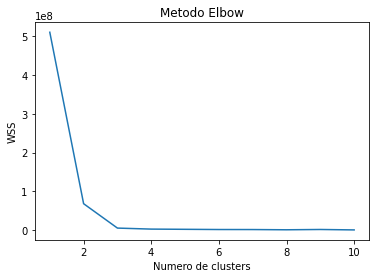

In [38]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [39]:
#Silhouette Score
#Valor varia entre -1 e +1
#1: Clusters bem mais separados e com valores melhor definidos
#0: Distância entre os clusters formados não é significativa
#-1: Valores dos clusters errados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores_silhouette_scores = []

for i in range(2,15):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit_predict(aux)
    score = silhouette_score(aux, km.labels_, metric='euclidean')
    
    x = []
    x.append(i)
    x.append(score)
    valores_silhouette_scores.append(x)

print(valores_silhouette_scores)

#Melhor valor encontrado = 4



[[2, 0.8452659001383949], [3, 0.80451878882459], [4, 0.7135371274015847], [5, 0.5614543895820086], [6, 0.5081123102145144], [7, 0.4877510888837269], [8, 0.4846655787918348], [9, 0.45930070110422094], [10, 0.39014669398795127], [11, 0.2828725203764603], [12, 0.1851961289080895], [13, 0.19849132972601946], [14, 0.1978178111345651]]


In [40]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[20449.93130972  -537.54406066]
 [-2664.14188157  -184.69479867]
 [ 1508.129511     724.43767534]
 [-2650.34264944  -191.35976644]
 [ 2091.5589432    888.38467764]
 [-2508.79476574  -194.61569053]
 [-2649.97966591  -183.3838534 ]
 [-2622.9532278   -189.50318632]
 [-2662.83211214  -184.72604245]
 [ 1322.88419162   151.30707795]
 [-2663.94708875  -184.59735485]
 [ -993.19968761  -675.37125353]
 [ 1870.86123613   709.33237119]
 [-2642.27373039  -168.07133447]
 [-1900.288915     -34.91080968]
 [-2502.04570453  -147.15528991]
 [ 1821.63821793   578.29290153]
 [-2604.20398074  -175.82126271]]


In [41]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(aux)

print(cluster)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


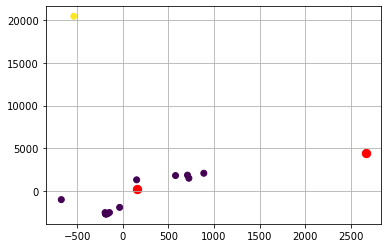

In [42]:
import matplotlib.pyplot as plt

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c='red') #posicao do centroide do agrupamento
plt.show()

In [41]:
#Pegando os centroides de cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[2.21901282e+01 4.22544246e+01 9.35265929e+01 5.38461538e-01
  7.43589744e-01 2.37179487e+01]
 [1.80681667e+01 6.51089333e+02 4.26393921e+02 3.33333333e-01
  2.16666667e+00 2.60000000e+01]
 [7.50370000e+01 8.28243987e+01 9.49896000e+02 6.66666667e-01
  1.66666667e+00 1.56666667e+01]]


In [44]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({0: 17, 1: 1})


In [45]:
#Mostrar o nome das cidades por cluster

cidades = [] #Armazena todos os ids das cidades contidos em aux
city = [] #Converte o id da cidade para o nome real da cidade
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

for i in range(len(aux)):
    cidades.append(aux[i][5])
city = le.inverse_transform(cidades)

for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    j = j + 1

print(c0)
print(c1)
print(c2)
print(c3)

#PROBLEMA: uma mesma cidade caiu em clusters diferentes (como temos 10 valores para cada cidade, alguns foram para clusters diferentes)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.